In [2]:
import numpy as np
import pandas as pd
import jdatetime
import matplotlib.pyplot as plt

In [5]:
uncleaned_data = "Uncleaned_Concert_Tours.csv"

# load raw data from csv file
df = pd.read_csv(uncleaned_data)

# Display first 5 rows for initial inspection
df.head(5)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1.0,2.0,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1.0,7.0,"$579,800,000","$579,800,000",NaN,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1.0,2.0,"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2.0,10.0,"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2.0,NaN,"$3,456,751,460","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,NaN,[8]


- filling numerical null values with 0 and categorical values with 'unknown'   
- dropping ref column cuz its useless  
- correcting column names (removing uselss symbols)    
- Remove $ and commas, handle non-breaking spaces, convert to float ===> in money related columns  
- extracting just the start year and making a new column for shamsi date   
- removing out of range values in 'actual gross' column    

**KEY QUESTIONS**   
1- Which artist has the highest grossing tour while performing between 50-100 shows during 2015-2020?    
2- Which tour title has the highest gross per show while maintaining above-average show counts?    

In [ ]:
# dropping ref column
# modifies the DataFrame directly without creating a new copy
df.drop('Ref.', axis=1, inplace=True)

In [ ]:
# Show dataset metadata and dimensions
# getting info about data types and sum of non null values...
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              20 non-null     int64  
 1   Peak                              9 non-null      float64
 2   All Time Peak                     6 non-null      float64
 3   Actual gross                      20 non-null     object 
 4   Adjusted gross (in 2022 dollars)  20 non-null     object 
 5   Artist                            19 non-null     object 
 6   Tour title                        18 non-null     object 
 7   Year(s)                           20 non-null     object 
 8   Shows                             20 non-null     int64  
 9   Average gross                     18 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ KB


(20, 10)

In [ ]:
# 11 null values for peak and 14 null values for all tiem peak
# 1 null value for artists and 2 null values for tour title and average gross
df.isnull().sum()

Rank                                 0
Peak                                11
All Time Peak                       14
Actual gross                         0
Adjusted gross (in 2022 dollars)     0
Artist                               1
Tour title                           2
Year(s)                              0
Shows                                0
Average gross                        2
dtype: int64

In [ ]:
df.describe()

,Rank,Peak,All Time Peak,Shows
count,20.000000,9.000000,6.000000,20.000000
mean,10.450000,1.555556,7.500000,110.000000
std,5.942488,0.527046,4.806246,66.507617
min,1.000000,1.000000,2.000000,41.000000
25%,5.750000,1.000000,3.250000,59.000000
50%,10.500000,2.000000,8.500000,87.000000
75%,15.250000,2.000000,10.000000,134.500000
max,20.000000,2.000000,14.000000,325.000000


In [ ]:
# Get a list of all column names in the DataFrame for inspection or debugging
df.columns.tolist()

['Rank',
 'Peak',
 'All Time Peak',
 'Actual\xa0gross',
 'Adjusted\xa0gross (in 2022 dollars)',
 'Artist',
 'Tour title',
 'Year(s)',
 'Shows',
 'Average gross']

In [ ]:
# correcting column names
df.columns = (
    df.columns
    .str.replace(r'[^\w\s]', '', regex=True)    # Remove special characters
    .str.replace('\xa0', ' ')                   # Replace non-breaking spaces
    .str.strip()                                # Remove leading/trailing whitespace
    .str.lower()                                # Convert to lowercase
    .str.replace(' ', '_')                      # Replace spaces with underscores
)

df.columns.tolist()

['rank',
 'peak',
 'all_time_peak',
 'actual_gross',
 'adjusted_gross_in_2022_dollars',
 'artist',
 'tour_title',
 'years',
 'shows',
 'average_gross']

In [ ]:
money_cols = ['actual_gross', 'adjusted_gross_in_2022_dollars', 'average_gross']
for col in money_cols:
    # Remove $ and commas, handle non-breaking spaces, convert to float
    df[col] = (df[col].astype(str)
               .str.replace(r'[^\d.]', '', regex=True)  # Keep only digits and decimal points
               .replace('', np.nan)                     # Handle empty strings
               .astype(float))                          # convert to float

In [ ]:
# removing useless symbols from tour title 
df['tour_title'] = df['tour_title'].str.replace(r'[†‡\[a-d\]]', '', regex=True).str.strip()

In [ ]:
# Extract just the start year and overwrite the original column
df['years'] = df['years'].str.split('–').str[0].astype('Int64')

# convert years into shamsi years and storing them in a new column
def date_convertion(year):
    return jdatetime.GregorianToJalali(int(year), 1, 1).jyear

df['shamsi_year'] = df['years'].apply(date_convertion)


df.head()

,rank,peak,all_time_peak,actual_gross,adjusted_gross_in_2022_dollars,artist,tour_title,years,shows,average_gross,shamsi_year
0,1,1.0,2.0,7.800000e+08,780000000.0,Taylor Swift,The Ers Tour,2023,56,13928571.0,1401
1,2,1.0,7.0,5.798000e+08,579800000.0,NaN,Renissne Worl Tour,2023,56,10353571.0,1401
2,3,1.0,2.0,4.110000e+08,560622615.0,Madonna,Stiky & Sweet Tour 4,2008,85,4835294.0,1386
3,4,2.0,10.0,3.973000e+08,454751555.0,Pink,Beutiful Trum Worl Tour,2018,156,2546795.0,1396
4,5,2.0,NaN,3.456751e+09,402844849.0,Taylor Swift,Reputtion Stium Tour,2018,53,NaN,1396


In [ ]:
# handling categorical missing values
# 1- filling them with unknown:

df['artist'] = df['artist'].fillna('Unknown')
df['tour_title'] = df['tour_title'].fillna('Unknown')

# 2- or just drop it
# df.dropna(subset=['Artist', 'Tour title'])


# -------------------------------------------------


# handling numerical missing values
# filling null values with 0
df['peak'] = df['peak'].fillna(0)
df['all_time_peak'] = df['all_time_peak'].fillna(0)


# calculating gross per show and storing them in a new column
df['gross_per_show'] = df['actual_gross'] / df['shows']
df['average_gross'] = df['average_gross'].fillna(df['gross_per_show'])

In [ ]:
df.isna().sum()

rank                              0
peak                              0
all_time_peak                     0
actual_gross                      0
adjusted_gross_in_2022_dollars    0
artist                            0
tour_title                        0
years                             0
shows                             0
average_gross                     0
shamsi_year                       0
gross_per_show                    0
dtype: int64

In [ ]:
# Nice :D
print("\nDuplicate rows:")
df.duplicated().sum()

# if there were duplicated rows we could drop them:
# df = df.drop_duplicates()


Duplicate rows:


0

In [ ]:
# keep rows where actual gross is between 150M and 800M
df = df[(df['actual_gross'] >= 150000000) & (df['actual_gross'] <= 800000000)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            18 non-null     int64  
 1   peak                            18 non-null     float64
 2   all_time_peak                   18 non-null     float64
 3   actual_gross                    18 non-null     float64
 4   adjusted_gross_in_2022_dollars  18 non-null     float64
 5   artist                          18 non-null     object 
 6   tour_title                      18 non-null     object 
 7   years                           18 non-null     Int64  
 8   shows                           18 non-null     int64  
 9   average_gross                   18 non-null     float64
 10  shamsi_year                     18 non-null     int64  
 11  gross_per_show                  18 non-null     float64
dtypes: Int64(1), float64(6), int64(3), object(2

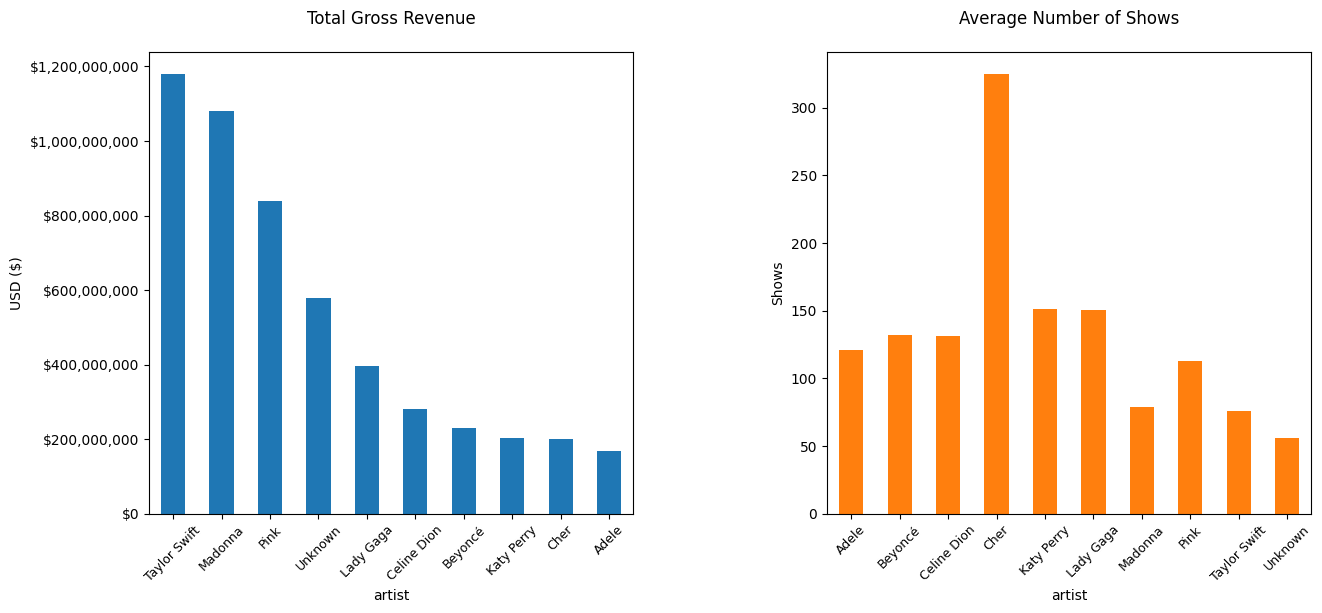

In [ ]:
artist_gross = df.groupby('artist')['actual_gross'].sum().sort_values(ascending=False)
avg_shows = df.groupby('artist')['shows'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.4)  # Adjust space between plots

# Plot 1: Total Gross Revenue
artist_gross.plot(kind='bar', ax=ax1, color='#1f77b4')
ax1.set_title('Total Gross Revenue', pad=20)
ax1.set_ylabel('USD ($)')
ax1.yaxis.set_major_formatter('${x:,.0f}')  # Proper currency format
ax1.tick_params(axis='x', rotation=45, labelsize=9)

# Plot 2: Average Shows
avg_shows.plot(kind='bar', ax=ax2, color='#ff7f0e')
ax2.set_title('Average Number of Shows', pad=20)
ax2.set_ylabel('Shows')
ax2.tick_params(axis='x', rotation=45, labelsize=9)

plt.show()

In [ ]:
# filtering by year and shows
filtered = df[
    (df['shows'].between(50, 100)) & 
    (df['years'].between(2015, 2020))
]

# Get top artist by 'actual gross'
top_artist = filtered.loc[filtered['actual_gross'].idxmax(), ['artist', 'tour_title', 'actual_gross', 'shows']]

print(f"Highest grossing artist: {top_artist['artist']}")
print(f"Tour: {top_artist['tour_title']}")
print(f"Revenue: ${top_artist['actual_gross']:,.0f}")
print(f"Shows: {top_artist['shows']}")


print("----------------------------------------------------------")


# Calculate average show count
avg_shows = df['shows'].mean()

# Filter tours with above-average shows
high_volume_tours = df[df['shows'] > avg_shows]

# Find top by gross per show
top_tour = high_volume_tours.loc[high_volume_tours['gross_per_show'].idxmax(), 
                                ['artist', 'tour_title', 'gross_per_show', 'shows']]

print(f"\nBest performing tour: {top_tour['tour_title']}")
print(f"Artist: {top_tour['artist']}")
print(f"Gross per show: ${top_tour['gross_per_show']:,.0f}")
print(f"Total shows: {top_tour['shows']}")

Highest grossing artist: Taylor Swift
Tour: The 1989 Worl Tour
Revenue: $250,400,000
Shows: 85
----------------------------------------------------------

Best performing tour: Beutiful Trum Worl Tour
Artist: Pink
Gross per show: $2,546,795
Total shows: 156


In [ ]:
# saving cleaned data
df.to_csv('Cleaned_Concert_Tours.csv', index=False)